In [1]:
import rebound
import numpy as np
import pandas as pd

In [2]:
def rerun(row):
    try:
        safilename = 'K23uniform/K23_logm_sa_{0}.bin'.format(int(row['sim']))
        sa = rebound.SimulationArchive(safilename)
    except: # doesn't already exist. Make one
        startfilename = 'K23/K23_logm_start_{0}.bin'.format(int(row['sim']))
        sim = rebound.Simulation(startfilename)
        P1 = sim.particles[1].P
        sim.automateSimulationArchive(safilename, interval=1e9*P1/100.)
        try:
            sim.integrate(1e9 * P1, exact_finish_time=0)
        except:
            sim.simulationarchive_snapshot(safilename)

In [3]:
dfspock = pd.read_csv("K23/K23_logm_SPOCK.csv", index_col=0)

In [4]:
dfspock.head()

,sim,k,h,Z12,Zcom12,Z23,Zcom23,e1,e2,e3,m1,m2,m3,probstability,m1+m2,m2+m3,total m
0,0.0,-0.193662,-0.285635,0.388670,0.636611,0.735677,0.664992,0.867296,0.345097,0.712553,6.213249,13.376343,40.220045,0.0,19.589593,53.596389,59.809638
1,1.0,0.342728,-0.343074,0.332211,0.559205,0.640342,0.191515,0.357091,0.484935,0.377275,0.485521,4.204200,3.251008,0.0,4.689721,7.455208,7.940729
2,2.0,0.210379,-0.115803,0.217568,0.243371,0.641480,0.408302,0.269689,0.240145,0.559020,1.452781,4.575729,11.466701,0.0,6.028510,16.042429,17.495211
3,3.0,0.024894,0.395947,0.292039,0.090441,0.257699,0.312442,0.046320,0.396729,0.026889,19.684153,3.179315,1.719421,0.0,22.863469,4.898737,24.582890
4,4.0,-0.379218,0.096536,0.209768,0.486905,0.896058,0.423220,0.227684,0.391312,0.701445,0.858439,159.849724,0.681329,0.0,160.708163,160.531053,161.389493


In [5]:
dfspock.shape

(27053, 17)

In [6]:
rerun(dfspock.loc[0])

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulation.py:352: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulation.py:352: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


In [ ]:
%%time
import dask.dataframe as dd
ddfspock = dd.from_pandas(dfspock, npartitions=48)
ddfspock.apply(rerun, axis=1).compute(scheduler='processes')

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulation.py:352: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulation.py:352: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)
/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/dask/dataframe/core.py:3966: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'object'))

  warnings.warn(meta_warning(meta))
/mnt/

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulation.py:352: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulation.py:352: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulation.py:352: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulation.py:352: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simu

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:89: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulation.py:352: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulation.py:352: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulation.py:352: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/r

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulation.py:352: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulation.py:352: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulation.py:352: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulation.py:352: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebou

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:89: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:89: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:89: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:89: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/r

In [10]:
'K23/K23_logm_sa_{0}.bin'.format(798)

'K23/K23_logm_sa_798.bin'

In [ ]:
df2.shape

In [ ]:
filename = 'K23uniform/K23_logm_sa_{0}.bin'.format(0)
sa = rebound.SimulationArchive(filename)
sim = sa[0]
P1 = sim.particles[1].P
print(sa[-1].t/P1)

In [57]:
filename = 'K23/K23_logm_sa_{0}.bin'.format(139)
sa = rebound.SimulationArchive(filename)
len(sa)


162693.32022779557


In [25]:
sa[-1].t/P1

ZeroDivisionError: float division by zero

In [29]:
sim.particles[1].P

0.12225762622347786

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:138: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:138: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


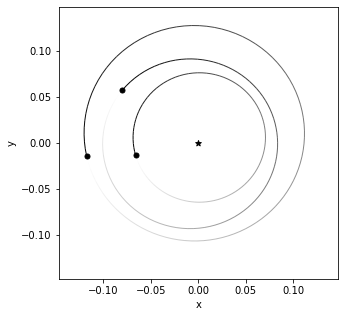

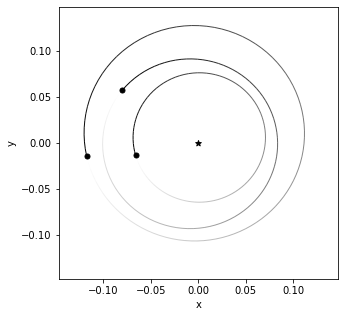

In [28]:
%matplotlib inline
sim = sa[0]
rebound.OrbitPlot(sim)